# Capacitive voltage conversion

Classical power conversion makes use of inductors and transformers to deliver power at different voltage levels. However, these components typically transform these power converters into bulky and heavy components. However, there are several applications where we only need a voltage and a rather limited current sourced. Moreover, for power converters on silicon chips, efficient inductors are not possible and capacitive power converters are needed. In this chapter we discuss those power converters.

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import SchemDraw
from SchemDraw import elements as e

def pilarschema(numberstages=3, add_resistor=False, add_transformer=False):
    d = SchemDraw.Drawing()
    if add_transformer:
        xf=d.add(e.transformer(t1=4, t2=7 ))
        d.add(e.LINE, xy=xf.p1, l=d.unit/4, d='left', lftlabel='p1')
        d.add(e.LINE, xy=xf.p2, l=d.unit/4, d='left', lftlabel='p2')
        d.add(e.LINE, xy=xf.s1,  d='right', l=1.9)
        startpos=d.add( e.DOT )
        d.add(e.LINE, xy=xf.s2,  d='right', l=4)
    else:
        startpos=d.add( e.DOT )
        d.add( e.LINE, d='left', l=1.9)
        d.add( e.SOURCE_SIN, d='down', label='20V')
        d.add( e.LINE, d='right', l=4)
    d.add( e.DOT )
    grond=d.add(e.GND)
    d.add( e.LINE, d='right', l=2)
    d.add( e.DOT )
    l1=d.add( e.LINE, d='up', toy=startpos.end,xy=grond.start)
    d.add( e.DOT )
    pos=l1.end
    for stage in range(numberstages): 
        D1=d.add(e.DIODE_F, theta=135, flip=True ,xy=pos)
        d.add( e.DOT )
        C1=d.add(e.CAP, d='down', toy=D1.start )
        C1.add_label( r'$C1_{'+str(stage)+'}$', loc='top' )
        D2=d.add(e.DIODE_F, theta=0, flip=True,xy=D1.end, tox=D1.start)
        D2.add_label( r'$\alpha_{'+str(stage)+'}$', loc='lft' )
        if stage !=numberstages-1:
            D2.add_label( r'$\beta_{'+str(stage)+'}$', loc='rgt' )
        d.add( e.DOT )
        C2=d.add(e.CAP, d='down', toy=D1.start )
        C2.add_label( r'$C2_{'+str(stage)+'}$', loc='bot' )
        pos=D2.end
    d.add( e.LINE, d='right', l=2,xy=pos)
    d.add( e.DOT )
    if add_resistor:
        d.add( e.RES, d='down', toy=grond.start)
    d.draw()
    

def HVPilar(vamplitude=20,numberstages=1,vd=0.7,tmax=0.2,f=50,c1=150e-9,c2=150e-9,g=0,numberofsteps=500):
    step=tmax/numberofsteps
    factor=np.exp(-numberstages*g/c2*step)
    factor1=c2/(c1+c2)
    omega=np.pi*2*f
    time=np.arange(0,tmax,step)
    alpha=[vamplitude*np.sin(omega*time)]
    beta=[time*0.0]
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(time,alpha[0],label='input')
    for stage in range(numberstages): 
        vB=[0]
        vE=[0]
        for i in range(1,len(time)):
            vnext1_1=vB[-1]+alpha[stage][i]-alpha[stage][i-1]
            vnext1_2=vB[-1]+(alpha[stage][i]-alpha[stage][i-1])*factor1 #  ladingsherverdeling
            vnext2=vnext1_2-vd  
            if vnext1_1<beta[stage][i]-vd:
                vE.append(vE[-1]*factor)
                vB.append(beta[stage][i]-vd)  # ook hier moet ladingsherverdeling op  te doen
            else:
                if vnext2>vE[-1]:
                    vE.append(vnext2)
                    vB.append(vnext1_2)
                else:
                    vB.append(vnext1_1)
                    vE.append(vE[-1]*factor)
        alpha.append(vB)
        beta.append(vE)
        ax.plot(time,alpha[stage+1],label=r'$\alpha_{'+str(stage)+'}$')
        ax.plot(time,beta[stage+1],label=r'$\beta_{'+str(stage)+'}$')
    ax.axhline(linestyle="-.",color='black')
    ax.set_xlabel('time (s)')
    ax.set_ylabel('Voltage (V)')
    ax.set_xlim(0,tmax)
    ax.legend(loc='upper left');

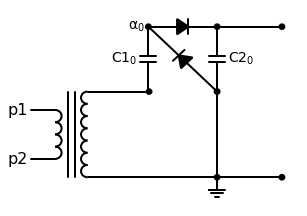

In [150]:
pilarschema(numberstages=1, add_transformer=True)

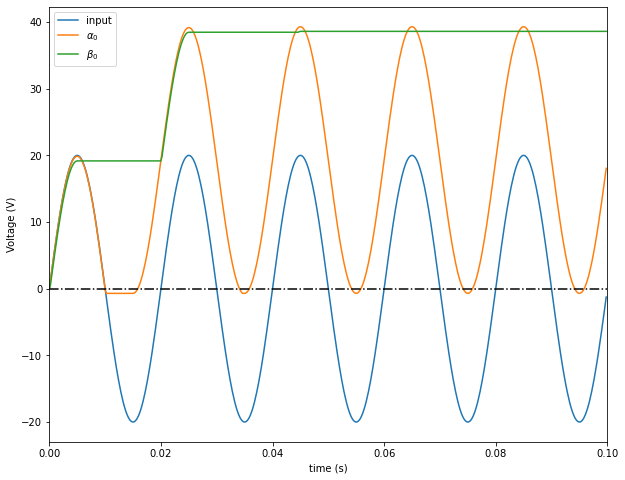

In [96]:
HVPilar(c1=1e-9,c2=150e-9, tmax=0.1)

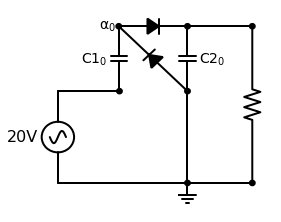

In [153]:
pilarschema(numberstages=1, add_resistor=True)

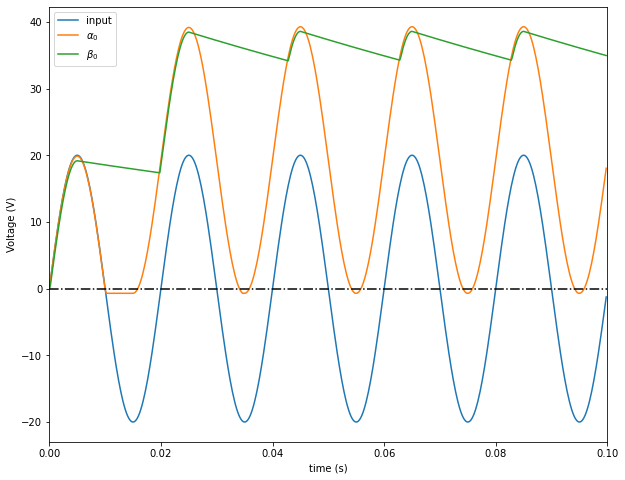

In [98]:
HVPilar(c1=1e-9,c2=150e-9, tmax=0.1,g=1e-6)

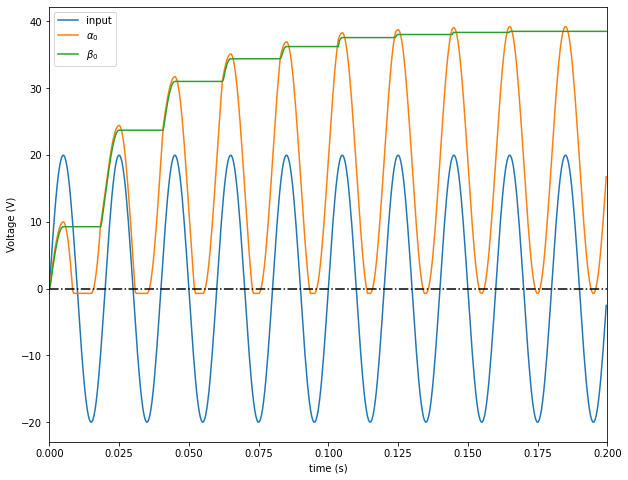

In [97]:
HVPilar()

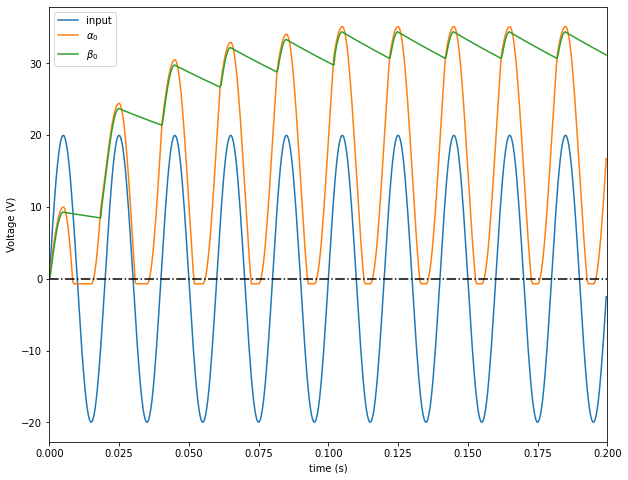

In [92]:
HVPilar(g=1e-6)

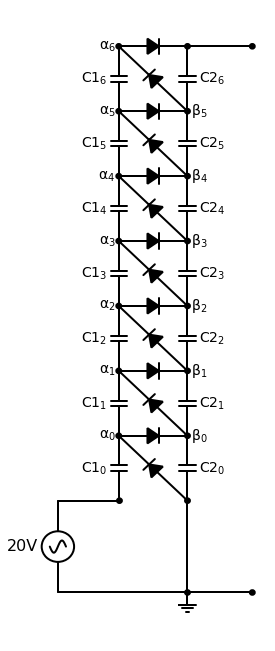

In [154]:
pilarschema(numberstages=7)

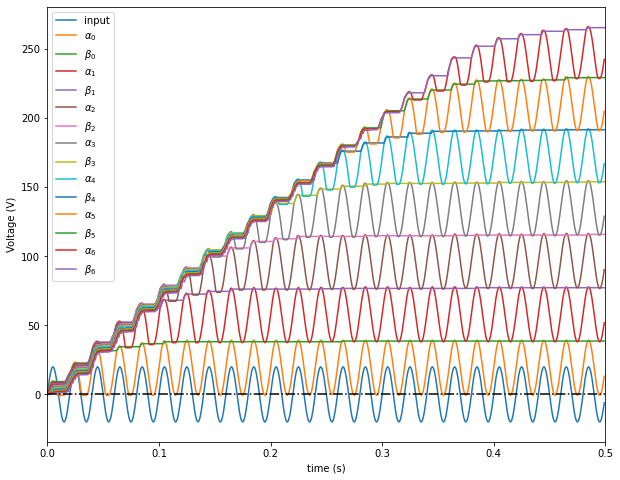

In [94]:
HVPilar(numberstages=7,tmax=0.5)

In [1]:
# Test including spice-file  (dit werk nog niet)

#  ![spice](step2.sp)
